# Assignment 3

Team:

- Bertan Karacora

Tasks:

- For your experiments, use at least one augmentation from each of the following types:
    - Spatial Augmentations (rotation, mirroring, croppoing, ...)
    - Use some other augmentations (color jitter, gaussian noise, ...).
    - Use one (or more) of the following advanced augmentations:
    - **CutMix**: https://arxiv.org/pdf/1905.04899.pdf
    - **Mixup**: https://arxiv.org/pdf/1710.09412.pdf

- **Experiments 1:** Using your aforementioned augmentions:
    - Fine-tune ResNet, MobileNet, and ConvNext for your augmented dataset for car type classification and compare them.
    - Compare the following on a model of your choice: Fine-Tuned model, model as fixed feature extractor, and model with a Combined Approach
    - Log your losses and accuracies into Tensorboard (or some other logging tool)
    - **Extra Point**:
        - Fine-tune a Transformer-based model (e.g. SwinTransformer). Compare the performance (accuracy, confusion matrix, training time, loss landscape, ...) with the one from the convolutional models.
   
- **Experiment 2:** Try to get the best performance possible on this dataset
    - Fine-tune a pretrained neural network of your choice for classification.
    - Select a good training recipe: augmentations, optimizer, learning rate scheduling, classifier, loss function, ...

## Contents

- [x] [Setup](#setup)
    - [x] [Config](#setup_config)
    - [x] [Modules](#setup_modules)
    - [x] [Paths and names](#setup_paths_and_names)
- [ ] [Data augmentation](#data_augmentation)
    - [x] [Visualization](#data_augmentation_visualization)
    - [ ] [Discussion](#data_augmentation_discussion)
- [ ] [Comparison of fine-tuned models](#comparison_of_fine_tuned_models)
    - [ ] [ResNet](#comparison_of_fine_tuned_models_resnet)
    - [ ] [MobileNet](#comparison_of_fine_tuned_models_mobilenet)
    - [ ] [ConvNext](#comparison_of_fine_tuned_models_convnext)
    - [ ] [Discussion](#comparison_of_fine_tuned_models_discussion)
- [ ] [Comparison of transfer learning approaches](#comparison_of_transfer_learning_approaches)
    - [ ] [Fixed feature extraction](#comparison_of_transfer_learning_approaches_fixed_feature_extraction)
    - [ ] [Fine-tuning](#comparison_of_transfer_learning_approaches_fine_tuning)
    - [ ] [Combined approach](#comparison_of_transfer_learning_approaches_combined_approach)
    - [ ] [Discussion](#comparison_of_transfer_learning_approaches_discussion)
- [ ] [Tensorboard](#tensorboard)
    - [ ] [Visualization](#tensorboard_visualization)
    - [ ] [Discussion](#tensorboard_discussion)
- [ ] [Fine-tuning a transformer-based model](#fine_tuning_a_transformer_based_model)
    - [ ] [Training and evaluation](#fine_tuning_a_transformer_based_model_training_and_evaluation)
    - [ ] [Discussion](#fine_tuning_a_transformer_based_model_discussion)
- [ ] [Car type classification](#car_type_classification)
    - [ ] [Training and evaluation](#car_type_classification_training_and_evaluation)
    - [ ] [Discussion](#car_type_classification_discussion)

## Setup
<a id="setup"></a>

### Config
<a id="setup_config"></a>

In [1]:
import assignment.config as config

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/config.yaml


In [2]:
config.list_available()

['stanfordcars_convnext',
 'stanfordcars_mobilenet',
 'stanfordcars_resnet copy',
 'stanfordcars_resnet',
 'svhn_cnn',
 'svhn_cnn_l1',
 'svhn_cnn_l2',
 'svhn_mlp']

### Modules
<a id="setup_modules"></a>

In [3]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
from assignment.evaluation.evaluator import Evaluator
from assignment.training.trainer import Trainer
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.libs.utils_model as utils_model
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [4]:
name_exp_resnet = "stanfordcars_resnet"
name_exp_mobilenet = "stanfordcars_mobilenet"
name_exp_convnext = "stanfordcars_convnext"

path_dir_exp_resnet = Path(config._PATH_DIR_EXPS) / name_exp_resnet
path_dir_exp_mobilenet = Path(config._PATH_DIR_EXPS) / name_exp_mobilenet
path_dir_exp_convnext = Path(config._PATH_DIR_EXPS) / name_exp_convnext

## Data augmentation
<a id="data_augmentation"></a>

### Visualization
<a id="data_augmentation_visualization"></a>

In [7]:
init_exp.init_exp(name_exp=name_exp_resnet, name_config=name_exp_resnet)
config.set_config_exp(path_dir_exp_resnet)

Initializing experiment stanfordcars_resnet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_resnet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/config.yaml
Initializing experiment stanfordcars_resnet finished
Config loaded from /home/user/karacora/la

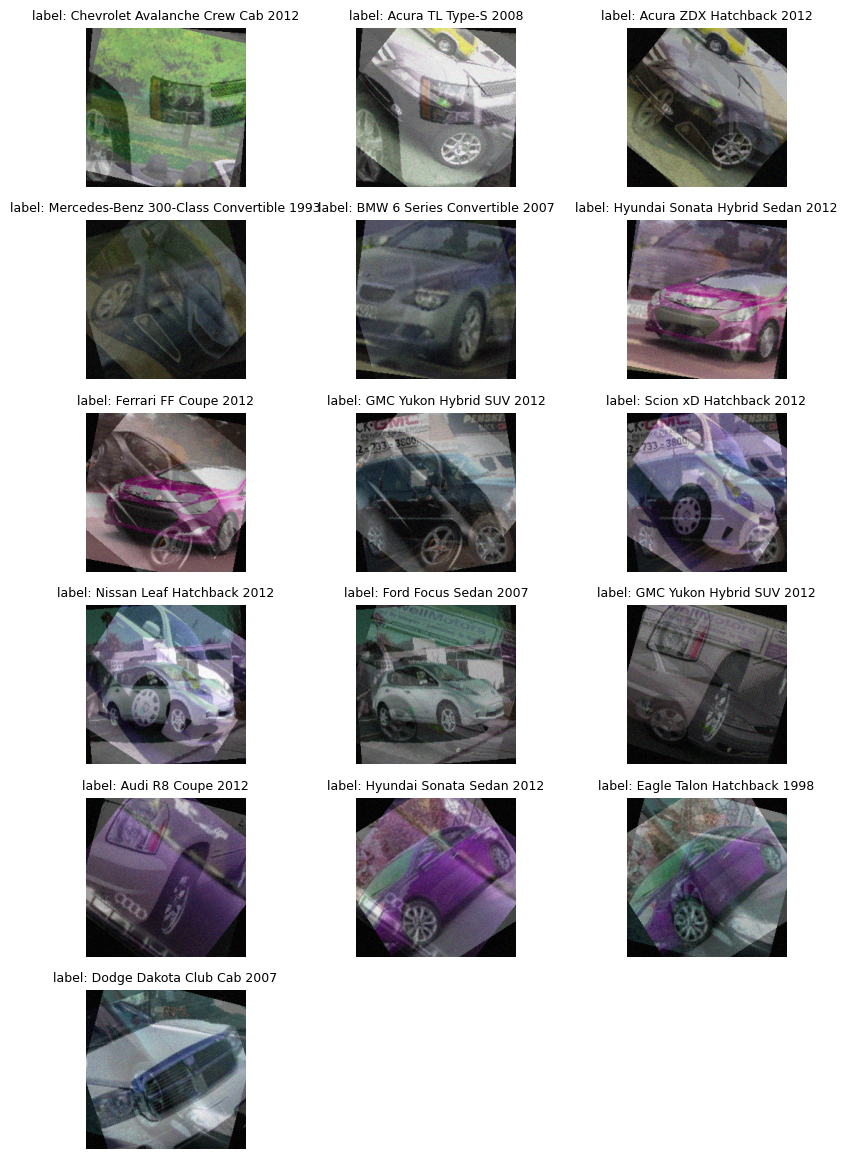

In [8]:
dataset_train, dataloader_train = utils_data.create_dataset_and_dataloader(split="train")
images, labels = utils_data.sample(dataloader_train, num_samples=16, unnormalize=True)

visualize.visualize_images(images, labels=dataset_train.labelset[labels.argmax(axis=1)])

### Discussion
<a id="data_augmentation_discussion"></a>

## Comparison of fine-tuned models
<a id="comparison_of_fine_tuned_models"></a>

### ResNet
<a id="comparison_of_fine_tuned_models_resnet"></a>

In [9]:
init_exp.init_exp(name_exp=name_exp_resnet, name_config=name_exp_resnet)
config.set_config_exp(path_dir_exp_resnet)

Initializing experiment stanfordcars_resnet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_resnet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_resnet/config.yaml
Initializing experiment stanfordcars_resnet finished
Config loaded from /home/user/karacora/la

In [10]:
trainer = Trainer(name_exp_resnet)
# trainer.loop(config.TRAINING["num_epochs"])
trainer.loop(10)
log_resnet = trainer.log

plot.plot_loss(log_resnet)
plot.plot_metrics(log_resnet)

Setting up dataloaders...
Train dataset
Dataset StanfordCars
    Number of datapoints: 6515
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: train
    Transform: Compose(
      PILToTensor()
      RandomResizedCrop(size=[224, 224], scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-45.0, 45.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      ColorJitter(brightness=(0.5, 1.5), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
      GaussianNoise(mean=0.0, std=0.05)
      Clip(min=0.0, max=1.0)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Validate dataset
Dataset StanfordCars
    Number of datapoints: 1629
    Path: /home

Validating: Epoch 000 | Batch 025 | Loss 5.52012: 100%|██████████| 26/26 [00:03<00:00,  8.38it/s]
  0%|          | 0/102 [00:02<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB. GPU 

In [9]:
_, model_resnet, _, _ = utils_checkpoints.load(path_dir_exp_resnet / "checkpoints" / "final.pth")

evaluator_resnet = Evaluator(name_exp_resnet, model_resnet)
evaluator_resnet.evaluate()

print(f"Loss on test data: {evaluator_resnet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_resnet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

Setting up dataloader...
Test dataset
Dataset StanfordCars
    Number of datapoints: 8041
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: test
    Transform: Compose(
      PILToTensor()
      Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=[224, 224])
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Setting up dataloader finished
Setting up criterion...
Setting up criterion finished
Setting up measurers...
Setting up measurers finished


Validating: Batch 125 | Loss 4.45130: 100%|██████████| 126/126 [00:16<00:00,  7.42it/s]

Loss on test data: 4.377108985164127
Metrics on test data
    Accuracy  : 0.07138415619947767


### MobileNet
<a id="comparison_of_fine_tuned_models_mobilenet"></a>

In [5]:
init_exp.init_exp(name_exp=name_exp_mobilenet, name_config=name_exp_mobilenet)
config.set_config_exp(path_dir_exp_mobilenet)

Initializing experiment stanfordcars_mobilenet...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_3/assignment/configs/stanfordcars_mobilenet.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_3/experiments/stanfordcars_mobilenet/config.yaml
Initializing experiment stanfordcars_mobilenet finished
Config loaded 

In [6]:
trainer = Trainer(name_exp_mobilenet)
# trainer.loop(config.TRAINING["num_epochs"])
trainer.loop(3)
log_mobilenet = trainer.log

plot.plot_loss(log_mobilenet)
plot.plot_metrics(log_mobilenet)

Setting up dataloaders...
Train dataset
Dataset StanfordCars
    Number of datapoints: 6515
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_3/data/stanfordcars
    Split: train
    Transform: Compose(
      PILToTensor()
      RandomResizedCrop(size=[224, 224], scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomHorizontalFlip(p=0.5)
      RandomRotation(degrees=[-45.0, 45.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      ToDtype(
    dtype=float32, scale=True
    (transform_tv): ToDtype(scale=True)
  )
      ColorJitter(brightness=(0.5, 1.5), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
      GaussianNoise(mean=0.0, std=0.1)
      Clip(min=0.0, max=1.0)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
    Transform of target: None
Validate dataset
Dataset StanfordCars
    Number of datapoints: 1629
    Path: /home/

Validating: Epoch 000 | Batch 025 | Loss 5.28076: 100%|██████████| 26/26 [00:03<00:00,  7.72it/s]
  0%|          | 0/102 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 50.00 MiB. GPU 

In [ ]:
_, model_mobilenet, _, _ = utils_checkpoints.load(path_dir_exp_mobilenet / "checkpoints" / "final.pth")

evaluator_mobilenet = Evaluator(name_exp_mobilenet, model_mobilenet)
evaluator_mobilenet.evaluate()

print(f"Loss on test data: {evaluator_mobilenet.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_mobilenet.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### ConvNext
<a id="comparison_of_fine_tuned_models_convnext"></a>

In [ ]:
init_exp.init_exp(name_exp=name_exp_convnext, name_config=name_exp_convnext)
config.set_config_exp(path_dir_exp_convnext)

In [ ]:
trainer = Trainer(name_exp_convnext)
trainer.loop(config.TRAINING["num_epochs"])
log_convnext = trainer.log

plot.plot_loss(log_convnext)
plot.plot_metrics(log_convnext)

In [ ]:
_, model_convnext, _, _ = utils_checkpoints.load(path_dir_exp_convnext / "checkpoints" / "final.pth")

evaluator_convnext= Evaluator(name_exp_convnext, model_convnext)
evaluator_convnext.setup_criterionevaluate()

print(f"Loss on test data: {evaluator_convnext.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator_convnext.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")

### Discussion
<a id="comparison_of_fine_tuned_models_discussion"></a>

## Comparison of transfer learning approaches
<a id="comparison_of_transfer_learning_approaches"></a>

### Fixed feature extraction
<a id="comparison_of_transfer_learning_approaches_fixed_feature_extraction"></a>

### Fine-tuning
<a id="comparison_of_transfer_learning_approaches_fine_tuning"></a>

See [above](#comparison_of_fine_tuned_models_mobilenet).

### Combined approach
<a id="comparison_of_transfer_learning_approaches_combined_approach"></a>

### Discussion
<a id="comparison_of_transfer_learning_approaches_discussion"></a>

## Tensorboard
<a id="tensorboard"></a>

### Visualization
<a id="tensorboard_visualization"></a>

### Discussion
<a id="tensorboard_discussion"></a>

## Fine-tuning a transformer-based model
<a id="fine_tuning_a_transformer_based_model"></a>

### Training and evaluation
<a id="fine_tuning_a_transformer_based_model_training_and_evaluation"></a>

### Discussion
<a id="comparison_of_transfer_learning_approaches_discussion"></a>

## Car type classification
<a id="car_type_classification"></a>

### Training and evaluation
<a id="car_type_classification_training_and_evaluation"></a>

### Discussion
<a id="car_type_classification_discussion"></a>